## Credit Card - Default - Classification Problem


## Project Overview

* The objective is to predict whether or not a credit card client will default for their payment in the next month. 
* We will explore 2 classifiers namely, Random Forest and KNN Classifier, and determine the best of a given set of hyperparameters by using grid search.
* We will follow the steps: Data exploration and pre-processing; pipeline to carry out classification; compare different metrics and classifiers


In [1]:
## Use this for consistency in graphs through out the notebook
import numpy as np
import pandas as pd
import seaborn as sns
import scipy

# to make this notebook's output stable across runs
np.random.seed(123)

# To plot nice figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

* The credit card data set can be found using this link 

https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients
(https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients)

The data is open for public use and no authorizations are required.

In [2]:
#reading the dataset
df = pd.read_excel("./default of credit card clients.xls", sheet_name = 0, skiprows= 1, header = 0)

# 1. Data exploration

In [3]:
#Looking at the data
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
#Looking at the shape of the data
df.shape

(30000, 25)

In [5]:
#Looking at the information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [6]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [7]:
#Checking if there are any null values
df.isnull().values.any()

False

In [8]:
#Confirming all the data types
np.unique(df.dtypes)

array([dtype('int64')], dtype=object)

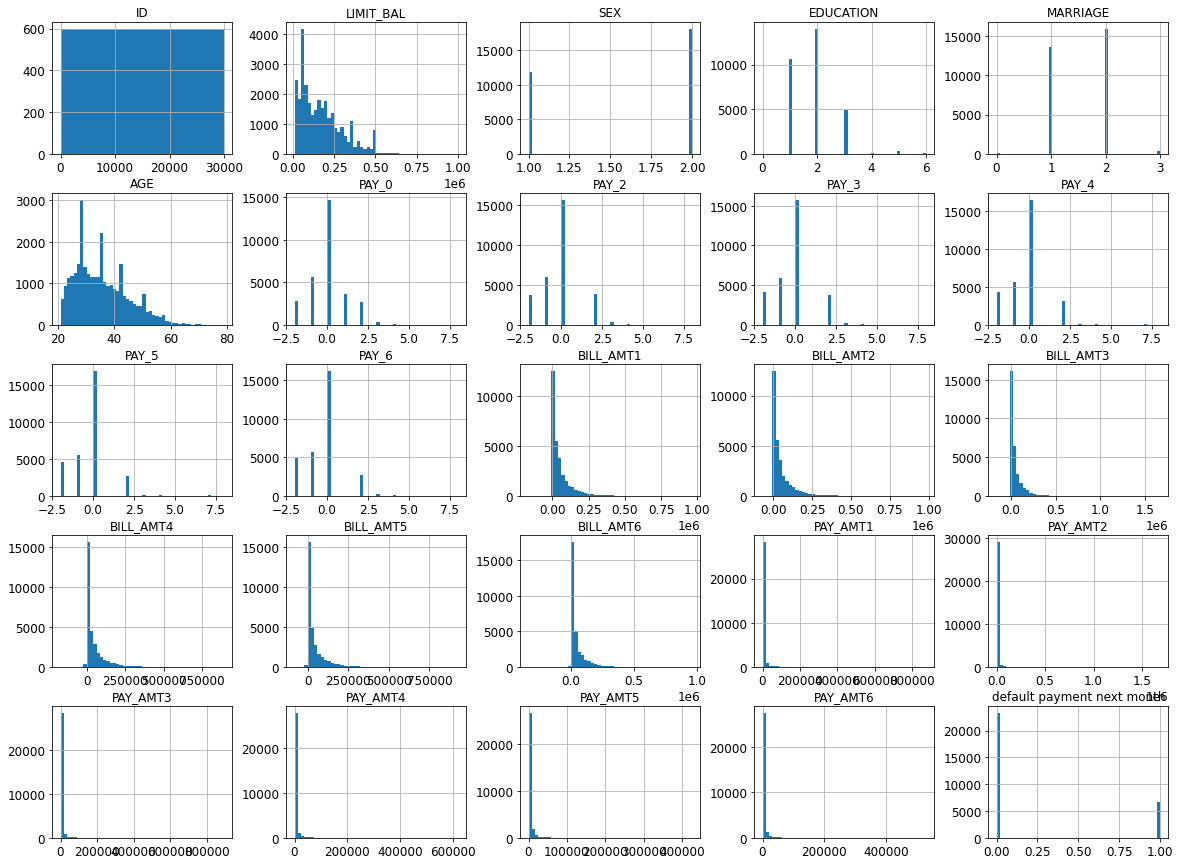

In [9]:
#Examining the distribution individually
df.hist(bins=50, figsize=(20,15))
plt.show()

In [10]:
dep_var = 'default payment next month'
df[dep_var].value_counts()

0    23364
1     6636
Name: default payment next month, dtype: int64

Noting the requirements for a good machine learning dataset:

Features should not have any missing values - we checked and there is no missing value, so no imputation is required

All features must be numerical - we checked that all features are numerical, all of them are integers

Features should have the same or similar scales (in particular, range and expected value) - we will treat this during the pipeline building

We can see that the ID column is not necessary and we can drop it (it is redundant).

In [11]:
df = df.drop('ID', axis=1)

In [12]:
#Taking a look at the correlation
corr_matrix = df.corr(method='pearson')
corr_matrix[dep_var].sort_values(ascending=False)

default payment next month    1.000000
PAY_0                         0.324794
PAY_2                         0.263551
PAY_3                         0.235253
PAY_4                         0.216614
PAY_5                         0.204149
PAY_6                         0.186866
EDUCATION                     0.028006
AGE                           0.013890
BILL_AMT6                    -0.005372
BILL_AMT5                    -0.006760
BILL_AMT4                    -0.010156
BILL_AMT3                    -0.014076
BILL_AMT2                    -0.014193
BILL_AMT1                    -0.019644
MARRIAGE                     -0.024339
SEX                          -0.039961
PAY_AMT6                     -0.053183
PAY_AMT5                     -0.055124
PAY_AMT3                     -0.056250
PAY_AMT4                     -0.056827
PAY_AMT2                     -0.058579
PAY_AMT1                     -0.072929
LIMIT_BAL                    -0.153520
Name: default payment next month, dtype: float64

We can check which features are good predictors of default payment next month. We can see that the history of past payment is a good predictor and the amount of given credit is negatively correlated with default payment next month.

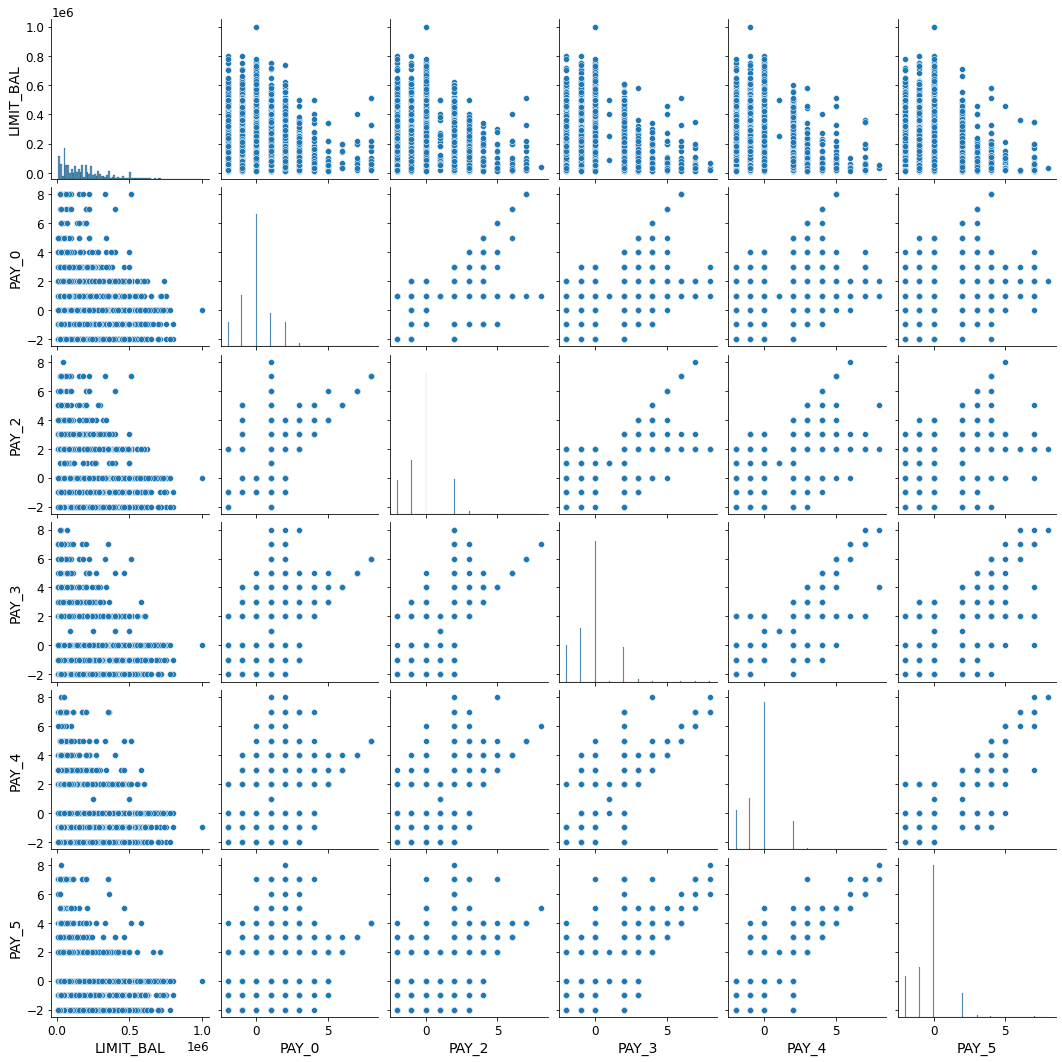

In [13]:
sns.pairplot(data=df.iloc[:, [0, 5, 6, 7, 8, 9]])
plt.show()

We should also note that after exploring the data:

Sex, Education, Marriage, PAY_0 and PAY-2 to PAY-6 are actually categorical - see description of data set

The other columns are numeric. We will keep this in mind for the data preprocessing.

# 2. Data Preprocessing:

- We need to build a full data pipeline, check if we require any data pre-processing and if all the features are useful.
- Set the random seed to 123 (For splitting or any other random algorithm)
- Split data into training (80%) and testing (20%)
- Use Cross-validation with 5-folds
- For other parameters,we will use default

In [14]:
#Splitting the data types

categorical_vars = ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']

numerical_vars = ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
                 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

dep_var = ['default payment next month']

In [15]:
#Transformation pipelines for the variables
# Categorical - one hot encode
cat_ohe_step = ('ohe', OneHotEncoder(sparse=False, handle_unknown='ignore'))
cat_pipe = Pipeline([cat_ohe_step])
cat_transformers = [('cat', cat_pipe, categorical_vars)]

# Numerical - scale
num_scl_step = ('scl', MinMaxScaler())
num_pipe = Pipeline([num_scl_step])
num_transformers = [('num', num_pipe, numerical_vars)]

In [16]:
#Using the pipelines to transform the data
ct = ColumnTransformer(transformers=cat_transformers + num_transformers)
ct.fit(df[categorical_vars + numerical_vars])
X = ct.transform(df[categorical_vars + numerical_vars])
# We know from our exploration that the dependent variable does not have any missing values. 
#And it is not necessary to apply transformations to normalize or scaleit
y = df[dep_var].values

In [17]:
#We noticed that for the dependent variable there are much more "No" than "Yes", so we need to make sure that we are avoiding sampling
#bias, therefore we need to do stratified sampling

def stratisfy_and_split(data, column, target, test_size = 0.2, random_seed_chosen = 123):
    
    #Using StratifiedShuffleSplit to split the data into 80% train and 20% test but maintaining even proportions of the dependent var.
       
    split = StratifiedShuffleSplit(n_splits=1, test_size=test_size, random_state=random_seed_chosen)
    for train_index, test_index in split.split(data, data[column]):
        strat_train_set = data.loc[train_index]
        strat_test_set = data.loc[test_index]

    y_train = strat_train_set[target].values
    X_train = strat_train_set.drop(target, axis=1)
    
    y_test = strat_test_set[target].values
    X_test = strat_test_set.drop(target, axis=1)
    return X_train, y_train, X_test, y_test

In [18]:
X_train, y_train, X_test, y_test = stratisfy_and_split(df, dep_var, dep_var)

In [19]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape
print('Train proportion: {}'.format((y_train == 0).sum()/(y_train == 1).sum()))
print('Test proportion: {}'.format((y_test == 0).sum()/(y_test == 1).sum()))

Train proportion: 3.520625353173856
Test proportion: 3.5214770158251696


- Now we made sure that we have the same proportion considering the dependent variable on both data sets (train and test). We can proceed with the classification models.

# 3. Classification:

- We will study the ROC Curve and decide threshold.
- 2 classifiers: 
a. Random Forest
  - tune only: n_estimators: {4, 5, 10, 20, 50}.  We will be running random forest model using GridSearchCV, determine the best hyperparameter for the given list of n_estimators {4, 5, 10, 20, 50}. n_estimators refers to the number of trees in the forest. We will use CV = 5 and the scoring to be the roc_auc (area under the curve)
b. KNN Classfier
  - tune only: n_neighbors: {3, 5, 10, 20}. Perform similar GridSearchCV as in the previous model with a given list of n_neightbors. 

- Starting with Random Forest

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedShuffleSplit, GridSearchCV
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, classification_report, accuracy_score, precision_score, recall_score, f1_score

#Performning hyperparameter search
model_classifier = "RandomForestClassifier"

#Performing grid search
param_grid = [{'n_estimators': [4, 5, 10, 20, 50]}]
random_forest = RandomForestClassifier(random_state=123)
grid_search = GridSearchCV(random_forest, param_grid, cv=5,
                            return_train_score=True, n_jobs =-1)
    
grid_search.fit(X_train, y_train.ravel())
    
print('The best hyperparameters for the given list of n_estimators is: {}'.format(grid_search.best_params_))

best_model = grid_search.best_estimator_

# Using the best model and show performance results
predictions = best_model.predict(X_test)
accuracy_score(y_test, predictions)
print('Accuracy Score of Random Forest Classifier {}'.format(accuracy_score(y_test, predictions)))
print('ROC AUC Score of Random Forest Classifier {}'.format(roc_auc_score(y_test, predictions)))

The best hyperparameters for the given list of n_estimators is: {'n_estimators': 50}
Accuracy Score of Random Forest Classifier 0.8133333333333334
ROC AUC Score of Random Forest Classifier 0.6476018416818643


Cross validation results over n_estimators


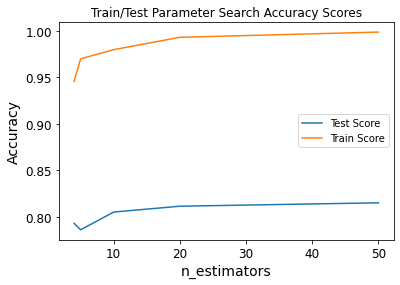

In [21]:
#Plotting cross validation results
print("Cross validation results over n_estimators")
mean_test_scores = [score for score in grid_search.cv_results_['mean_test_score']]
mean_train_score = [score for score in grid_search.cv_results_['mean_train_score']]
params = [param['n_estimators'] for param in grid_search.cv_results_['params']]
    
plt.plot(params, mean_test_scores, label='Test Score')
plt.plot(params, mean_train_score, label='Train Score')
plt.title('Train/Test Parameter Search Accuracy Scores')
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Receiver Operating Characteristic (ROC) Curve for Random Forest Classifier


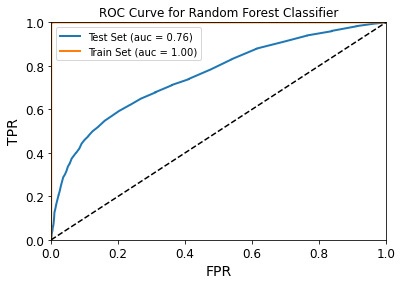

In [22]:
#Plotting ROC Curve
print('Receiver Operating Characteristic (ROC) Curve for Random Forest Classifier')
    
# Test Set
predicted = grid_search.best_estimator_.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, predicted)
auc = roc_auc_score(y_test, predicted)
plt.plot(fpr, tpr, linewidth=2, label='Test Set (auc = {0:.2f})'.format(auc))
    
# Train Set
predicted = grid_search.best_estimator_.predict_proba(X_train)[:,1]
fpr, tpr, thresholds = roc_curve(y_train, predicted)
auc = roc_auc_score(y_train, predicted)
plt.plot(fpr, tpr, linewidth=2, label='Train Set (auc = {0:.2f})'.format(auc))
    
    
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([0, 1, 0, 1])
plt.xlabel('FPR', fontsize=14)
plt.ylabel('TPR', fontsize=14)
plt.title('ROC Curve for Random Forest Classifier')
plt.legend()
plt.show()

Precision Recall Curve for Random Forest Classifier


Text(0, 0.5, 'Recall')

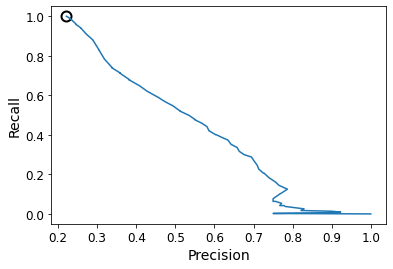

In [23]:
#Plotting precision recall curve
from sklearn.metrics import precision_recall_curve

test_predicted = grid_search.best_estimator_.predict_proba(X_test)[:,1]
precision, recall, thresholds = precision_recall_curve(y_test,test_predicted)

#find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds))
print("Precision Recall Curve for Random Forest Classifier")
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
label="threshold zero", fillstyle="none", c='k', mew=2)
plt.plot(precision, recall, label="precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")

In [24]:
#Analyzing the thresholds
columns = ['Threshold', 'Accuracy', 'Recall', 'Precision', 'F1 Score']
performance_measures = [accuracy_score, recall_score, precision_score, f1_score]
thresholds = [0.1, 0.3, 0.5, 0.7, 0.9]
scores = []

for threshold in thresholds:
    predicted_probs = grid_search.best_estimator_.predict_proba(X_test)[:,1]
    test_predicted = np.array(predicted_probs > threshold).astype(int)
    scores.append([threshold] + [performance_func(y_test,test_predicted) for performance_func in performance_measures])

performance_df = pd.DataFrame(scores, columns=columns)
display(performance_df)

,Threshold,Accuracy,Recall,Precision,F1 Score
0,0.1,0.495500,0.879427,0.289291,0.435367
1,0.3,0.774500,0.549359,0.491240,0.518677
2,0.5,0.813333,0.350414,0.643154,0.453659
3,0.7,0.803000,0.161266,0.756184,0.265839
4,0.9,0.781833,0.017332,0.821429,0.033948


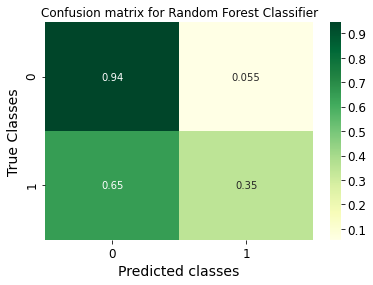

In [25]:
#Plotting confusion matrix
y_predicted = grid_search.best_estimator_.predict(X_test)
cm = confusion_matrix(y_test, y_predicted)
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.title('Confusion matrix for Random Forest Classifier')
sns.heatmap(cmn, annot=True, cmap="YlGn")
plt.xlabel('Predicted classes')
plt.ylabel('True Classes')
plt.show()

- Now the KNeighborsClassifier

In [26]:
#Repeating the process for KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedShuffleSplit, GridSearchCV
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, classification_report, accuracy_score, precision_score, recall_score


#Performning hyperparameter search
model_classifier = "KNN Classifier"

#Performing grid search
param_grid = [{'n_neighbors': [3, 5, 10, 20]}]
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5,
                            return_train_score=True, n_jobs =-1)
    
grid_search.fit(X_train, np.ravel(y_train))
    
print('The best hyperparameters for the given list of n_estimators is: {}'.format(grid_search.best_params_))

best_model = grid_search.best_estimator_

# Using the best model and show performance results
predictions = best_model.predict(X_test)
accuracy_score(y_test, predictions)
print('Accuracy Score of Random Forest Classifier {}'.format(accuracy_score(y_test, predictions)))
print('ROC AUC Score of Random Forest Classifier {}'.format(roc_auc_score(y_test, predictions)))

The best hyperparameters for the given list of n_estimators is: {'n_neighbors': 20}
Accuracy Score of Random Forest Classifier 0.7803333333333333
ROC AUC Score of Random Forest Classifier 0.5290213577622317


Cross validation results over n_neighbors


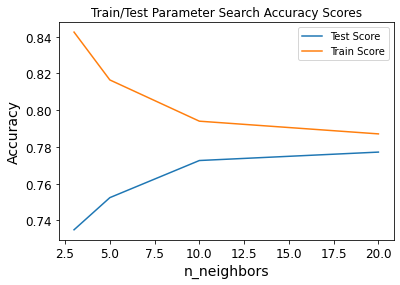

In [28]:
print("Cross validation results over n_neighbors")
mean_test_scores = [score for score in grid_search.cv_results_['mean_test_score']]
mean_train_score = [score for score in grid_search.cv_results_['mean_train_score']]
params = [param['n_neighbors'] for param in grid_search.cv_results_['params']]
    
plt.plot(params, mean_test_scores, label='Test Score')
plt.plot(params, mean_train_score, label='Train Score')
plt.title('Train/Test Parameter Search Accuracy Scores')
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Receiver Operating Characteristic (ROC) Curve for KNN Classifier


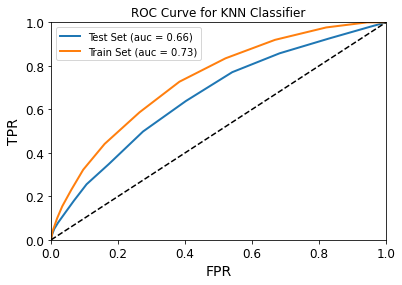

In [29]:
print('Receiver Operating Characteristic (ROC) Curve for KNN Classifier')
    
# Test Set
predicted = grid_search.best_estimator_.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, predicted)
auc = roc_auc_score(y_test, predicted)
plt.plot(fpr, tpr, linewidth=2, label='Test Set (auc = {0:.2f})'.format(auc))
    
# Train Set
predicted = grid_search.best_estimator_.predict_proba(X_train)[:,1]
fpr, tpr, thresholds = roc_curve(y_train, predicted)
auc = roc_auc_score(y_train, predicted)
plt.plot(fpr, tpr, linewidth=2, label='Train Set (auc = {0:.2f})'.format(auc))
    
    
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([0, 1, 0, 1])
plt.xlabel('FPR', fontsize=14)
plt.ylabel('TPR', fontsize=14)
plt.title('ROC Curve for KNN Classifier')
plt.legend()
plt.show()

Precision Recall Curve for KNN Classifier


Text(0, 0.5, 'Recall')

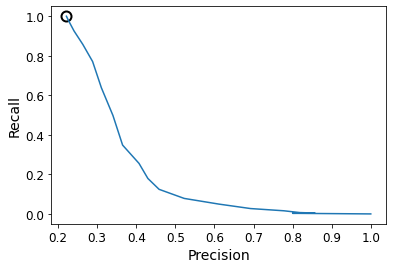

In [30]:
from sklearn.metrics import precision_recall_curve

test_predicted = grid_search.best_estimator_.predict_proba(X_test)[:,1]
precision, recall, thresholds = precision_recall_curve(y_test,test_predicted)

#find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds))
print("Precision Recall Curve for KNN Classifier")
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
label="threshold zero", fillstyle="none", c='k', mew=2)
plt.plot(precision, recall, label="precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")

In [31]:
#Analyzing the thresholds
columns = ['Threshold', 'Accuracy', 'Recall', 'Precision', 'F1 Score']
performance_measures = [accuracy_score, recall_score, precision_score, f1_score]
thresholds = [0.1, 0.3, 0.5, 0.7, 0.9]
scores = []

for threshold in thresholds:
    predicted_probs = grid_search.best_estimator_.predict_proba(X_test)[:,1]
    test_predicted = np.array(predicted_probs > threshold).astype(int)
    scores.append([threshold] + [performance_func(y_test,test_predicted) for performance_func in performance_measures])

performance_df = pd.DataFrame(scores, columns=columns)
display(performance_df)

C:\Users\Ivian\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Threshold,Accuracy,Recall,Precision,F1 Score
0,0.1,0.437333,0.857573,0.263121,0.402689
1,0.3,0.721833,0.348154,0.364929,0.356344
2,0.5,0.780333,0.078372,0.522613,0.136304
3,0.7,0.780000,0.006782,0.818182,0.013453
4,0.9,0.778833,0.000000,0.000000,0.000000


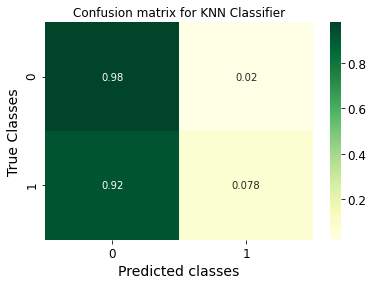

In [32]:
y_predicted = grid_search.best_estimator_.predict(X_test)
cm = confusion_matrix(y_test, y_predicted)
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.title('Confusion matrix for KNN Classifier')
sns.heatmap(cmn, annot=True, cmap="YlGn")
plt.xlabel('Predicted classes')
plt.ylabel('True Classes')
plt.show()

#### Conclusions

- The model that performs better in terms of roc auc is the Random Forest Classificer (0.65 compared with 0.53 for the KNN Classifier). We can also see that  that the best number of estimators for the Random Forest Classifier is 50 (note that this was also the highest value we used for the hyperparameter search. Additionally, the accuracy score for the train set reached 100% with 50 number of tress, and the test was between 80-85%. As for the ROC curve, the area reached 1 for 50 number of trees as well and 0.76 for the test set. Analyzing the thresholds, we can see that the performance metrics vary considerably. Selecting the default of 0.5, the accuracy of the model is 81%, recall of 35%, precision of 64% and F1 score of 45%. This is very balanced if we consider that we would like to predict people who defaulted, as shown in the confusion matrix - 94% of people who defaulted were correctly identified. The chosen threshold depends on what we would like to achieve with the model - pick people who made payments or defaulted, get a balanced accuracy, etc. We will consider the model picking most people who defaulted - the confusion matrix was plotted for the default threshold (0.5).
- As for the KNN Classifier, the best number of neighbours was 20, which is also the highest value we used for the hyperparameter search. We can also see that the training test accuracy decreased and the testing accuracy decreased with the increase of number of neighbours. The accuracy score for the train set and test set were reaching similar levels when the number of neighbours was increased, reaching close to 80% for both. The roc auc  Analyzing the thresholds, we can see that the performance metrics vary considerably as well. Selecting the default of 0.5, the accuracy of the model is 78%, recall of 8%, precision of 52% and F1 score of 14%. In this case it makes more difference what we would like to achieve with the model. Choosing the default threshold, we can predict well people who defaulted, as shown in the confusion matrix - 98% of people who defaulted were correctly identified, but the model just identified correctly 8% of people who made the payment.